## Creating your first workflow ##

Our first workflow will perform simple file manipulation using windows shell commands and a python script in order to
explore some basics functionnalities of [snakemake](https://snakemake.readthedocs.io/en/stable/):

- creating a simple rule
- creating a workflow
- rules with shell command and scripts
- using parameters
- using configfiles
- creating a graph of the snake workflow
- running a snake workflow

We use notebooks to interactively create files on the fly (%%writefile): Snakefile, scripts/create_file.py and config/config_file_snake.yml.

And to run snake command lines on the fly: cells starting with **!**

Let's dive into it!

### Import necessary python libraries and switch to the right repository ###

To properly run our jupyter notebook we need to import the following libraries:

In [1]:
# Import some python python libraries we will need to run this notebook
import os
from IPython import display

**And we should make sure that we are running from the right folder!**

Use the following lines to move to the folder deltares_snakemake:

In [2]:
#Should point to the folder where deltares_snakemake is stored
print(os.getcwd())
# Else uncomment to move to proper directory
os.chdir('..')
print(os.getcwd())
# Or directly enter the path here
#os.chdir(r'd:/repos/deltares_snakemake')
#print(os.getcwd())

c:\Code\Snakemake\deltares_snakemake\notebooks
c:\Code\Snakemake\deltares_snakemake


### Creating your first snakemake workflow ###

#### First rule ####

We use snakemake in order to write automatic and reproducible workflows. Here is how it works:

  - The **worklows** are defined in a **Snakefile**.
  - Each step in the workflow is defined via a **rule**.
  - Each rule describes a step to obtain **output file(s) from input file(s)**.
  - The step can be a **script** or **shell** (command lines) or **wrapper**.

  - **Dependencies** between rules are determined **automatically**.



In our first workflow, we will start with a rule that just copy an input file to an output file.
The different elements of this rule are:
  - The input file to copy in our data folder ("data/hello_world.txt")
  - The output file destination
  - The windows shell command to copy the input file to output

Here is the way to write out rule in snake:

In [21]:
%%writefile ./Snakefile
# This first line is used to save the snake code below into a file called "Snakefile"

######################################################################################
####################### Content of the Snakefile #####################################
### Import some useful python library ###

### Worflow and rules ###
# Rule to copy a file in Windows
rule run_copy_file:
    input: "data\\hello_world.txt"
    output: "output\\hello_world.txt"
    shell:
        """copy "data\\hello_world.txt" "output\\hello_world.txt" """

Overwriting ./Snakefile


You can see that the workflow consists of the following parts:

`input`: defines what input MUST be present to run the rule

`output`: defines what output MUST be created by the rule

`shell`: the shell command that creates the said `output` from said `input`

Snakemake will check if `input` exists. If it does not exist, it will look for another rule that may generate this `input` (i.e. a rule that has the same file as `output`). If it cannot find `input` nor a rule that creates it, it will throw an error.

Now let's see how to run our snakefile!

First, you can create an image of the content of the snakefile and the different workflows using the following command:

Building DAG of jobs...


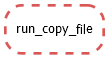

In [22]:
# Snake Command line to build the image with DAG diagram
! snakemake -s Snakefile --dag | dot -Tpng > _images/dag_copy_file.png
# Python command to visualise the built image in our notebook
display.Image("./_images/dag_copy_file.png")

Well not so interesting yet but we do see that at least our workflow was well understood and written by snake and we here see that there is one rule in our workflow called **run_copy_file**.
You can also notice that the rectangle line around our rule is full.

Let's now run our workflow!

The first line is used to unlock your working directory in order to save the future results of the workflow. This step is most of the time not necessary but may be needed in case a running workflow was abruptly interrupted by a powercut, a wall clock time expiry, or some other unforeseen reason.

In [23]:
! snakemake --unlock -s Snakefile

Building DAG of jobs...
Unlocked working directory.


And finally the command to run our workflow:

In [25]:
! snakemake -s Snakefile -c 1

Assuming unrestricted shared filesystem usage.
host: L50060
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


If all went well, you should now see that the hello_world file was properly copied into the output folder. We used `-c 1` to ensure only one thread is running to execute the workflow. If you wish to have several threads running in parallel, simply up the number after `-c` to the appropriate amount of threads. 

If we try to rebuild our workflow image with snake you would also see that snake now sees that nothing needs to be done anymore as all rule rectangles are with dashed lines:

Building DAG of jobs...


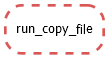

In [26]:
# Snake Command line to build the image
! snakemake -s Snakefile --dag | dot -Tpng > _images/dag_copy_file.png
# Python command to visualise the built image in our notebook
display.Image("./_images/dag_copy_file.png")

Some notes on the snakemake command line and most common options:

- **-s**: Snakefile to run
- **-c** or **-cores**: number of cores to use
- **-n** or **--dry-run**: performs a dry-run. Allows to see which rules snake would run without actually running.
- **--configfile**: path to snake config file 

For all available option, you can check the [CLI documentation](https://snakemake.readthedocs.io/en/stable/executing/cli.html).

#### Second rule and dependency ####

Now let's add some more rules so that we start to have a real workflow. We will add two rules. One that creates our first hello_world.txt file **create_file**. One that then copies it to the output folder **copy_file** and a last one to rename our file in the output folder **rename_file**. 

When we start to have several rules, it is always good to define a final rule, by convention called **all**, that recaps what is the final expected output of our workflow.

The Snakefile of our workflow would look like this:

In [32]:
%%writefile ./Snakefile
# This first line is used to save the snake code below into a file called "Snakefile"

######################################################################################
####################### Content of the Snakefile #####################################
### Import some useful python library and some needed lines of code ###
import os
root = os.getcwd() # or copy here the path to the delatres_snakemake folder eg root = r"d:\Repos\deltares_snakemake"

### Worflow and rules ###
# Master rule all (needed when several rules are defined, called all by convention)
rule all:
    input: root + "/output//snake2.txt"

# Rule to create a text file
rule create_file:
    output: root + "/data//snake.txt"
    shell:
        """echo Snakemake is fun! > {output}"""

# Rule to copy a file in Windows
rule copy_file:
    input: root + "/data//snake.txt"
    output: root + "/output//snake.txt"
    shell:
        """copy "data\\snake.txt" "output\\snake.txt" """

# Rule to rename a file
rule rename_file:
    input: root + "/output//snake.txt"
    output: root + "/output//snake2.txt"
    shell:
        """ren "output\\snake.txt" "snake2.txt" """

Overwriting ./Snakefile


Let's say what snake makes out of our file and if the dependency are well understood:

Building DAG of jobs...


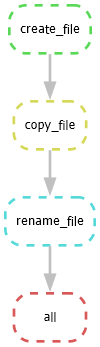

In [33]:
# Snake Command line to build the image
! snakemake -s Snakefile --dag | dot -Tpng > _images/dag_copy_file.png
# Python command to visualise the built image in our notebook
display.Image("./_images/dag_copy_file.png")

Here we can see that Snake found the dependency between all the rules automatically by analysing for each rule what are the input and which rule creates that input file.
When we run our workflow, we should now specify in the snakemake command the name of the last rule to execute, so here starting with *snakemake all*:

In [34]:
! snakemake --unlock -s Snakefile
! snakemake all -s Snakefile -c 1

Building DAG of jobs...
Unlocked working directory.
Assuming unrestricted shared filesystem usage.
host: L50060
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


#### Parameters and script ####

Let's make our workflow a little more complex. Let's say that in your shell command you want to use a parameter that is not a file. For input and output, snakemake only allows file names and paths but not, for example, text or numbers etc. For this you can add **params** in your rule.

Let's see how that works in our **create_file** rule:

In [35]:
%%writefile ./Snakefile
# This first line is used to save the snake code below into a file called "Snakefile"

######################################################################################
####################### Content of the Snakefile #####################################
### Import some useful python library and some needed lines of code ###
import os
root = os.getcwd() # or copy here the path to the deltares_snakemake folder eg root = r"d:\Repos\deltares_snakemake"

### Worflow and rules ###
# Master rule all (needed when several rules are defined, called all by convention)
rule all:
    input: root + "/output//snake2.txt"

# Rule to create a text file
rule create_file:
    output: root + "/data//snake.txt"
    params: "Snakemake is fun!"
    shell:
        """echo "{params}" > {output}"""

# Rule to copy a file in Windows
rule run_copy_file:
    input: root + "/data//snake.txt"
    output: root + "/output//snake.txt"
    shell:
        """copy "data\\snake.txt" "output\\snake.txt" """

# Rule to rename a file
rule rename_file:
    input: root + "/output//snake.txt"
    output: root + "/output//snake2.txt"
    shell:
        """ren "output\\snake.txt" "snake2.txt" """

Overwriting ./Snakefile


Let's rerun our workflow. Here snake will see that it needs to re-run the whole workflow as we have changed both the rule create_file as well as the params value. Else we can use the **--forceall** flag to force the re-run of the workflow.

In [36]:
! snakemake --unlock -s Snakefile
! snakemake all -s Snakefile -c 1

Building DAG of jobs...
Unlocked working directory.
Assuming unrestricted shared filesystem usage.
host: L50060
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


Now let's say we do not want to use windows **shell** command to create our file but rather a python **script** that we will later store in **scripts/create_file.py**. Let's first see what our new create_file rule looks like:

(Note here as well the syntax when using several named params and the presence of a comma *,*. You can also use this if you have sevral input or output files in your rule)

In [42]:
%%writefile ./Snakefile
# This first line is used to save the snake code below into a file called "Snakefile"

######################################################################################
####################### Content of the Snakefile #####################################
### Import some useful python library and some needed lines of code ###
import os
root = os.getcwd() # or copy here the path to the delatres_snakemake folder eg root = r"d:\repos\deltares_snakemake"

### Worflow and rules ###
# Master rule all (needed when several rules are defined, called all by convention)
rule all:
    input: root + "/output//snake2.txt"

# Rule to create a text file
rule create_file:
    output: root + "/data//snake.txt"
    params:
        line1 = "Snakemake is fun!",
        line2 = "It can use both shell commands and python scripts."
    script:
        "scripts//create_file.py"

# Rule to copy a file in Windows
rule run_copy_file:
    input: root + "/data//snake.txt"
    output: root + "/output//snake.txt"
    shell:
        """copy "data\\snake.txt" "output\\snake.txt" """

# Rule to rename a file
rule rename_file:
    input: root + "/output//snake.txt"
    output: root + "/output//snake2.txt"
    shell:
        """ren "output\\snake.txt" "snake2.txt" """

Overwriting ./Snakefile


Now let's create a python script that takes as input the text in **params** and the output file in **output** sections of our **snakemake** rule.

In a python script, snake arguments can directly be passed to the script using *snakemake.output* or *snakemake.params.param_name* for named input/output/params.

Let's see what that script woudl look like:

In [43]:
%%writefile ./scripts/create_file.py
# This first line is used to save the python code below into a file called "src/create_file.py"

######################################################################################
####################### Content of the python script #################################
from pathlib import Path 

# Main function 
def create_file(ouputfile: Path, lines: list) -> None:
    """
    Create a file with each line contant stored as items in ``lines`` list. Saves it to ``outputfile``.
    """
    with open(outputfile, 'w') as file:
        for line in lines:
            file.write(f"{line}\n")

# Get the snakemake arguments
outputfile = Path(str(snakemake.output))
line1 = snakemake.params.line1
line2 = snakemake.params.line2

# Run our function
create_file(outputfile, lines = [line1, line2])


Overwriting ./scripts/create_file.py


Let's now run our workflow with our python script:

In [44]:
! snakemake --unlock -s Snakefile
! snakemake all -s Snakefile -c 1

Building DAG of jobs...
Unlocked working directory.
Assuming unrestricted shared filesystem usage.
host: L50060
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


##### Adding a config file #####

We are almost there with our first example!
The last thing is that right now, our workflow is nice but not very generic, meaning that if we want to change the text we want to write in our file, we have to change the Snakefile directly while the workflow in essence is still the same.

To do that, Snake allows to use **config files** in order to specify all specific options in order to run your workflow. For example the output dir where to save all outputs or parameter values etc.

The configfile is in yaml format and the path to the configfile that Snake can use is specified in the snakemake command line with the **--configfile** flag.

Let's first write a config file with our two lines of text (feel free to edit the text) and save it in **config/snake_file_config.yml**:

In [45]:
%%writefile ./config/snake_file_config.yml
# This first line is used to save the snakeconfig below into a file called "config/snake_file_config.yml"

######################################################################################
####################### Content of the snake config ##################################
line1: "This is a new file generated with Snakemake"
line2: "this time using a configfile!"

Overwriting ./config/snake_file_config.yml


Now let's see the changes in the create_file rule:

In [48]:
%%writefile ./Snakefile
# This first line is used to save the snake code below into a file called "Snakefile"

######################################################################################
####################### Content of the Snakefile #####################################
### Import some useful python library and some needed lines of code ###
import os
root = os.getcwd() # or copy here the path to the delatres_snakemake folder eg root = r"d:\repos\deltares_snakemake"

### Parse config options ###
LINE1 = config["line1"]
LINE2 = config["line2"]

### Worflow and rules ###
# Master rule all (needed when several rules are defined, called all by convention)
rule all:
    input: root + "/output//snake2.txt"

# Rule to create a text file
rule create_file:
    output: root + "/data//snake.txt"
    params:
        line1 = LINE1,
        line2 = LINE2
    script:
        "scripts//create_file.py"

# Rule to copy a file in Windows
rule run_copy_file:
    input: root + "/data//snake.txt"
    output: root + "/output//snake.txt"
    shell:
        """copy "data\\snake.txt" "output\\snake.txt" """

# Rule to rename a file
rule rename_file:
    input: root + "/output//snake.txt"
    output: root + "/output//snake2.txt"
    shell:
        """ren "output\\snake.txt" "snake2.txt" """

Overwriting ./Snakefile


In the Snakefile **config** is not defined but directly used. The config argument will be automatically understood by snake when adding --configfile argument in the command line (note that also for unlocking or building an image, specifying the configfile becomes mandatory!):

In [49]:
! snakemake --unlock -s Snakefile --configfile config/snake_file_config.yml
! snakemake all -s Snakefile -c 1 --configfile config/snake_file_config.yml

Building DAG of jobs...
Unlocked working directory.
Assuming unrestricted shared filesystem usage.
host: L50060
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


Let's open the final file to see if it was created with the text from our config file:

In [50]:
final_file = "output/snake2.txt"
with open(final_file, "r", encoding="utf8") as f:
    txt = f.read()
print(txt)

This is a new file generated with Snakemake
this time using a configfile!

